**Project Description – Image classification using CNNs in Keras**

*`Data Description:`*
You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.

In [290]:
from google.colab import drive

In [291]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Question 1: Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)

In [292]:
##importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization, MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

In [293]:
##loading the dataset
df = pd.read_csv('/content/drive/My Drive/AIML/Labels.csv')
print("No.of unique", df.nunique())
df.groupby('Label')['Label'].count()

No.of unique Label    12
dtype: int64


Label
Black-grass                  263
Charlock                     390
Cleavers                     287
Common Chickweed             611
Common wheat                 221
Fat Hen                      475
Loose Silky-bent             654
Maize                        221
Scentless Mayweed            516
Shepherds Purse              231
Small-flowered Cranesbill    496
Sugar beet                   385
Name: Label, dtype: int64

In [294]:
##loading images.npy file
img_array = np.load('/content/drive/My Drive/AIML/images.npy')
print("Shape of the data is",img_array.shape)

Shape of the data is (4750, 128, 128, 3)


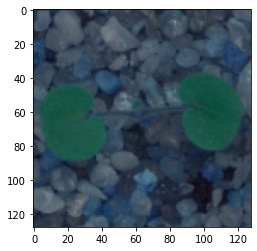

In [295]:
plt.imshow(img_array[0])

In [296]:
##Checking the same in label(y value)
df.loc[0]

Label    Small-flowered Cranesbill
Name: 0, dtype: object

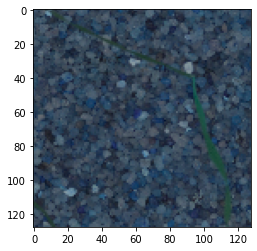

In [297]:
plt.imshow(img_array[4000])

In [298]:
##Checking the same in label(y value)
df.loc[4000]

Label    Black-grass
Name: 4000, dtype: object

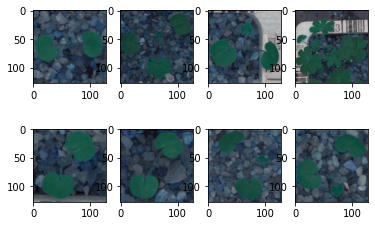

In [299]:
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(img_array[i])

Question 2.Data Pre-processing: (15 Marks)
1.   Normalization.
2.   Gaussian Blurring.
3. Visualize data after pre-processing.

In [300]:
##Normalization
img_norm = img_array.astype('float32') / 255.0

In [301]:
##Gaussian Bluring
#Creating an empty array to store the values after applying gaussian filter
img_gaus = np.empty((4750, 128, 128, 3))

##Applying gaussian filter
for idx, img in enumerate(img_norm):
  img_gaus[idx] = cv2.GaussianBlur(img, (5, 5), 0)

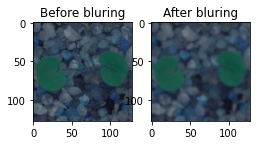

In [302]:
#Visualize data after pre-processing.
#Viewing the image after normalization and bluring
plt.subplot(2, 3, 1); plt.title('Before bluring'); plt.imshow(img_array[0])
plt.subplot(2, 3, 2); plt.title('After bluring'); plt.imshow(img_gaus[0])

Question 3. Make data compatible: (10 Marks)
1. Convert labels to one-hot-vectors.
2. Print the label for y_train[0].
3. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)
4. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

In [303]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Assigning numerical values and storing in another column
df['Label_cat'] = le.fit_transform(df['Label'])
df.head(10)

,Label,Label_cat
0,Small-flowered Cranesbill,10
1,Small-flowered Cranesbill,10
2,Small-flowered Cranesbill,10
3,Small-flowered Cranesbill,10
4,Small-flowered Cranesbill,10
5,Small-flowered Cranesbill,10
6,Small-flowered Cranesbill,10
7,Small-flowered Cranesbill,10
8,Small-flowered Cranesbill,10
9,Small-flowered Cranesbill,10


In [304]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
lab_enc_df = pd.DataFrame(enc.fit_transform(df[['Label_cat']]).toarray())
df = df.join(lab_enc_df)
print(df.head(10))

                       Label  Label_cat    0    1    2  ...    7    8    9   10   11
0  Small-flowered Cranesbill         10  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0
1  Small-flowered Cranesbill         10  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0
2  Small-flowered Cranesbill         10  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0
3  Small-flowered Cranesbill         10  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0
4  Small-flowered Cranesbill         10  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0
5  Small-flowered Cranesbill         10  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0
6  Small-flowered Cranesbill         10  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0
7  Small-flowered Cranesbill         10  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0
8  Small-flowered Cranesbill         10  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0
9  Small-flowered Cranesbill         10  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0

[10 rows x 14 columns]


In [305]:
y = df.iloc[0:,2:].values

In [306]:
#labels_array = np.array(labels)

In [307]:
#array = [img_gaus.astype(object),labels.astype(object)]

In [308]:
##splitting the dataset into training, testing and validataion
#splitting the images and labels into train and test set.
##First split images and labels into training and testing set with test_size = 0.3
X = img_gaus
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(1425, 128, 128, 3)
(3325, 12)
(1425, 12)


In [309]:
##Print the label for y_train[0].
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [310]:
#Then further split test data into test and validation set with test_size = 0.5
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 10)
print(X_test.shape)
print(X_val.shape)
print(y_test.shape)
print(y_val.shape)

(712, 128, 128, 3)
(713, 128, 128, 3)
(712, 12)
(713, 12)


In [311]:
##Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already.
##If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.
print("Shape of","X_train is",X_train.shape,"and y_train is",y_train.shape)
print("Shape of","X_test is",X_test.shape,"and y_test is",y_test.shape)
print("Shape of","X_val is",X_val.shape,"and y_val is",y_val.shape)

Shape of X_train is (3325, 128, 128, 3) and y_train is (3325, 12)
Shape of X_test is (712, 128, 128, 3) and y_test is (712, 12)
Shape of X_val is (713, 128, 128, 3) and y_val is (713, 12)


Question 4. Building CNN: (15 Marks)
1. Define layers.
2. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

In [312]:
##Defining layers
input_shape = (128,128,3)
no_of_classes = 12
#Creating model
model = Sequential()

In [313]:
model = Sequential()

#Set 1
#model.add(Conv2D(filters=32, kernel_size=(5, 5), input_shape=input_shape, activation='relu'))
#model.add(BatchNormalization(axis=3))
#model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
#model.add(BatchNormalization(axis=3))
#model.add(MaxPooling2D((2, 2)))

#set 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=input_shape, activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))
model.add(BatchNormalization())

#set 3
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))
model.add(BatchNormalization())

#set 4
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Dense(no_of_classes, activation='softmax'))

#summary
model.summary()

# compile model
optimizer = Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 126, 126, 64)      1792      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 62, 62, 64)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 62, 62, 64)        256       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 58, 58, 128)       204928    
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 54, 54, 128)      

In [314]:
##Setting optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)
#model.compile(loss = categorical_crossentropy, optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])

In [315]:
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping
path=(r"C:\Users\admin\Desktop\AIML\Project\Project 7")
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=20)
model_checkpoint =  ModelCheckpoint(filepath=path,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=True)

In [316]:
history = model.fit(X_train, y_train, batch_size=15, epochs=70, validation_data=(X_val,y_val), callbacks=[early_stopping,model_checkpoint])

Epoch 1/70
221/222 [============================>.] - ETA: 0s - loss: 1.9517 - accuracy: 0.3867
Epoch 00001: val_loss improved from inf to 5.11513, saving model to C:\Users\admin\Desktop\AIML\Project\Project 7
222/222 [==============================] - 8s 36ms/step - loss: 1.9497 - accuracy: 0.3871 - val_loss: 5.1151 - val_accuracy: 0.1571
Epoch 2/70
221/222 [============================>.] - ETA: 0s - loss: 1.2257 - accuracy: 0.6021
Epoch 00002: val_loss did not improve from 5.11513
222/222 [==============================] - 8s 34ms/step - loss: 1.2259 - accuracy: 0.6018 - val_loss: 6.8647 - val_accuracy: 0.1571
Epoch 3/70
221/222 [============================>.] - ETA: 0s - loss: 0.9420 - accuracy: 0.6860
Epoch 00003: val_loss improved from 5.11513 to 2.03416, saving model to C:\Users\admin\Desktop\AIML\Project\Project 7
222/222 [==============================] - 8s 35ms/step - loss: 0.9413 - accuracy: 0.6860 - val_loss: 2.0342 - val_accuracy: 0.4306
Epoch 4/70
221/222 [=============

Question 5: Fit and evaluate model and print confusion matrix. (10 Marks)

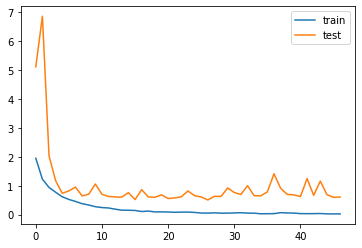

In [317]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [318]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 0s 16ms/step - loss: 0.6356 - accuracy: 0.8455
Test loss: 0.6355845332145691
Test accuracy: 0.8455055952072144


In [319]:
##Confusion Matrix
from sklearn.metrics import confusion_matrix
ypred = model.predict(X_test)

# confusion matrix
ypred1 = np.argmax(ypred, axis = 1) 
ytest1 = np.argmax(y_test, axis = 1) 

In [320]:
#simple confusion matrix
confusion_matrix(ytest1,ypred1)

array([[22,  0,  0,  1,  4,  0, 24,  0,  0,  1,  0,  0],
       [ 0, 58,  1,  0,  0,  0,  0,  0,  1,  1,  0,  0],
       [ 0,  1, 43,  0,  2,  0,  0,  2,  1,  0,  0,  0],
       [ 0,  0,  0, 98,  0,  0,  1,  1,  0,  0,  2,  2],
       [ 3,  0,  1,  0, 28,  0,  3,  0,  1,  1,  0,  0],
       [ 1,  0,  0,  0,  0, 52,  0,  1,  0,  0,  0,  2],
       [12,  0,  0,  0,  4,  0, 78,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0, 23,  0,  0,  0,  1],
       [ 0,  0,  0,  2,  1,  1,  0,  0, 58,  0,  2,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  1,  2, 26,  0,  1],
       [ 0,  0,  0,  3,  0,  0,  1,  2,  0,  0, 67,  0],
       [ 0,  1,  2,  0,  0,  1,  0,  4,  2,  0,  2, 49]])

In [321]:
labels = df['Label'].unique()
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix'):
    
    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

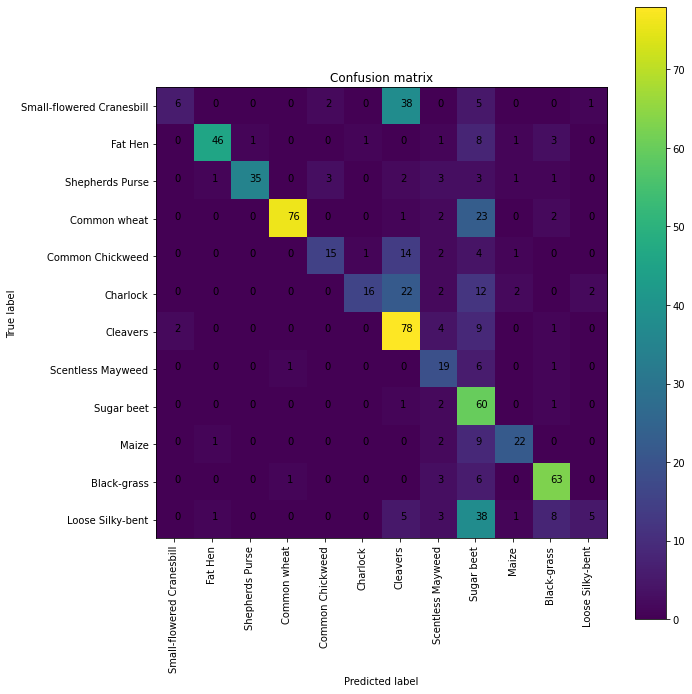

In [322]:
plot_confusion_matrix(confusionMTX, classes = labels) 

In [323]:
df.groupby('Label')['Label'].count()

Label
Black-grass                  263
Charlock                     390
Cleavers                     287
Common Chickweed             611
Common wheat                 221
Fat Hen                      475
Loose Silky-bent             654
Maize                        221
Scentless Mayweed            516
Shepherds Purse              231
Small-flowered Cranesbill    496
Sugar beet                   385
Name: Label, dtype: int64

In [324]:
#Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59].
list1 = [2,3,33,36,59]

Predicted name along with the images are given below:


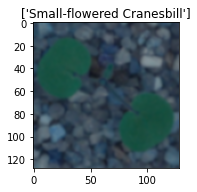

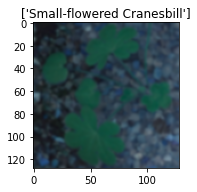

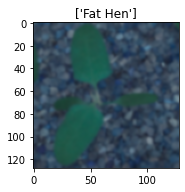

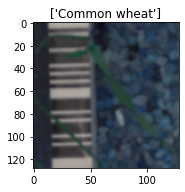

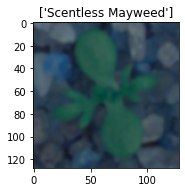

In [325]:
print("Predicted name along with the images are given below:")
for i in list1:
  fig = plt.figure(figsize=(12,12))
  plt.subplot(2, 4, list1.index(i)+ 1)
  pred_name = ((df[df.Label_cat==ypred1[i]]['Label']).unique()).tolist()
  plt.title(pred_name)
  plt.imshow(X_test[i])